# 数据可视化与分析

---

实现一些简单的数据可视化和编制指数，可视化包括：

- 历史价格数据折线图

- 历史日度回报柱状图

- 多个皮肤历史回报的柱状图

- 两个皮肤回报散点图

而对于指数，我只选择了略有磨损皮肤来编制，主要是由于我是爬取所有略有磨损皮肤的url,并从中获取其他磨损的价格数据，但在售数据只有略有磨损的。除此之外，当时选择略有磨损而不是别的磨损是因为几乎所有皮肤都具有略有磨损品质，而且价格也是最为合适的，毕竟提升到崭新出厂品质得到的磨损降低很少但价格上升很多，而久经沙场磨损又下降较大。

其次呢，关于指数具体编制，我选择分类别编制，根据皮肤种类分别编制，比如```蝴蝶刀（★） | 屠夫 (略有磨损)```就属于匕首种类，然后去除价格尾部10%和头部10%，然后再根据在售数量作为权重计算加权平均，就得到了价格指数。当然这里的指数编制其实较为随性。

---

为了方便查看，我把画的图移到了前面，代码放在了后面

首先是价格历史数据，正巧赶上了皮肤价格大跌的时间段（之前3月份CS2官宣带动皮肤上涨了一段时间，现在正是价值回归的时候）

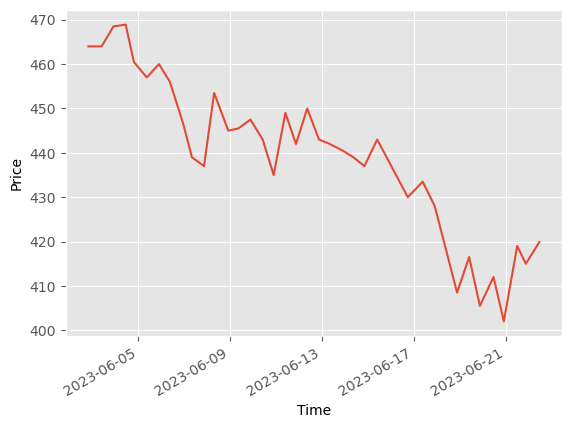

<Figure size 600x400 with 0 Axes>

In [3]:
PlotPrice('AK-47 | 霓虹骑士 (略有磨损)')

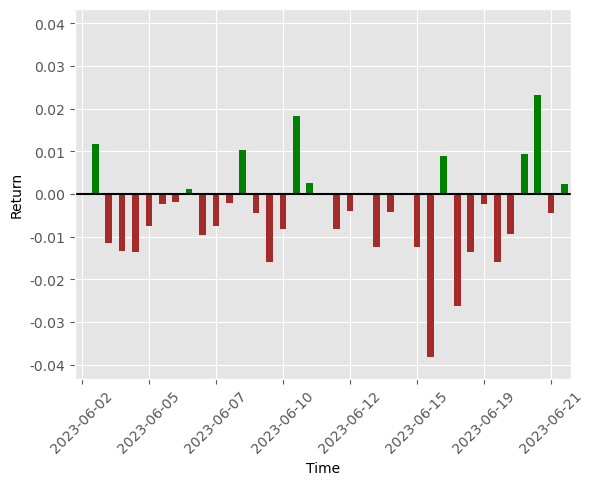

<Figure size 600x400 with 0 Axes>

In [4]:
PlotReturn('AK-47 | 可燃冰 (崭新出厂)')

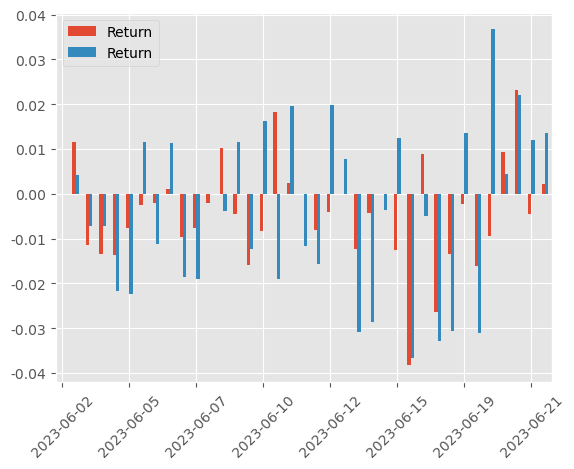

In [5]:
PlotReturns(['AK-47 | 可燃冰 (崭新出厂)','AK-47 | 可燃冰 (略有磨损)'])

散点图这里其比较有意思，我本以为同一款皮肤的不同磨损会有较大相关性，但前几天刚看的时候还没有显示多强的线性相关，最近才在第三象限出现了一些相关性，目前来说数据还是比较少

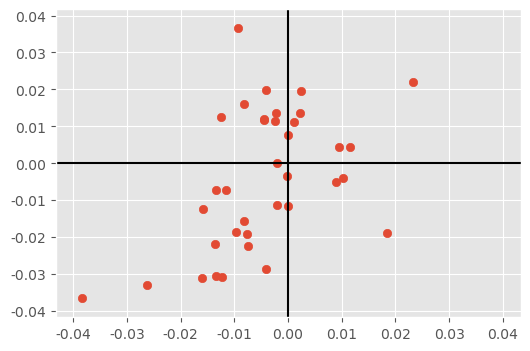

In [6]:
PairScatterPlot('AK-47 | 可燃冰 (崭新出厂)', 'AK-47 | 可燃冰 (略有磨损)')

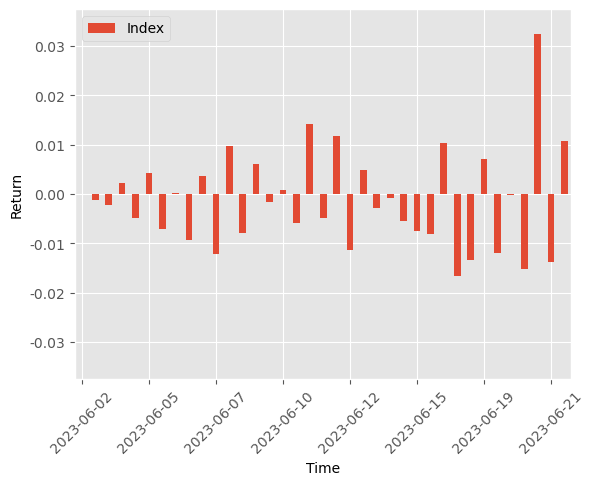

<Figure size 400x300 with 0 Axes>

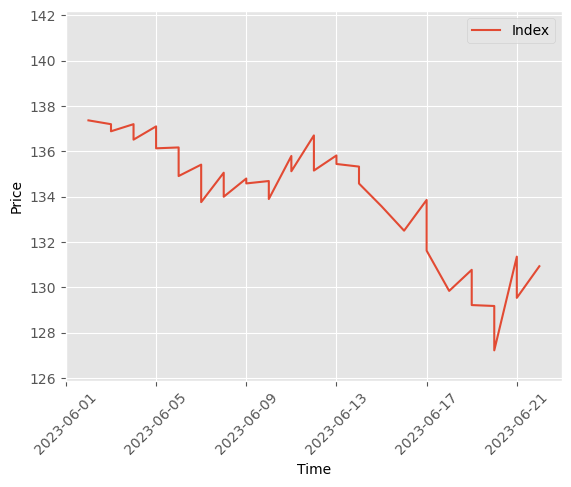

<Figure size 400x300 with 0 Axes>

In [7]:
PlotIndex('步枪', price=False)
PlotIndex('步枪')

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
plt.style.use('ggplot') 


# 数据预处理

data = pd.concat([pd.read_csv('./price_data/' + i) for i in os.listdir('./price_data/')])    # 导入数据

clean = lambda x : x.strip()
data['Full_name'] = data['Full_name'].apply(clean)     # 这里做strip是因为刚开始几天收集的略有磨损皮肤的名称最后有空格没去除
data['Time'] = pd.to_datetime(data['Time'])            # 转化时间变量
data.set_index('Time', inplace=True)                   # 调整index
data['OnSale'] = data['OnSale'].str.extract(r'(\d+)')  # 提取在售里面的数字
data['OnSale'] = data['OnSale'].apply(int)
data.head()

,Full_name,Quality,Type,Kind,Exterior,Price,OnSale
Time,,,,,,,
2023-06-10 21:45:00,蝴蝶刀（★） | 屠夫 (略有磨损),隐秘,★,匕首,略有磨损,10165.00,284
2023-06-10 21:45:00,蝴蝶刀（★） | 屠夫 (崭新出厂),隐秘,★,匕首,崭新出厂,12287.50,284
2023-06-10 21:45:00,蝴蝶刀（★） | 屠夫 (久经沙场),隐秘,★,匕首,久经沙场,8650.00,284
2023-06-10 21:45:00,暗影双匕（★） | 噩梦之夜 (略有磨损),隐秘,★,匕首,略有磨损,811.00,12
2023-06-10 21:45:00,暗影双匕（★） | 噩梦之夜 (久经沙场),隐秘,★,匕首,久经沙场,660.89,12


In [2]:
# 获取价格
def GetPrice(SkinName):
    '''
    Get the history price of with the given skin name
    
    Args:
        SkineName: string, the skin name
    Output:
        History price
    '''
    global data
    
    price = data[data['Full_name'] == SkinName]['Price'].sort_index()
    
    return price


# 获取百分比变化
def GetReturn(SkinName):
    '''
    Get the history return of with the given skin name
    
    Args:
        SkineName: string, the skin name
    Output:
        History return
    '''
    global data
    
    return_ = data[data['Full_name'] == SkinName]['Price'].sort_index().pct_change().rename('Return')
    
    return return_


# 画出价格走势
def PlotPrice(SkinName):
    '''
    Plot the history price of with the given skin name
    
    Args:
        SkineName: string, the skin name
    Output:
        History price plot
    '''
    global data
    
    GetPrice(SkinName).plot()
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.grid(True)
    plt.figure(figsize=(6, 4))
    
    return None


# 画出回报率走势
def PlotReturn(SkinName):
    '''
    Plot the history return of with the given skin name
    
    Args:
        SkineName: string, the skin name
    Output:
        History return plot
    '''
    global data
    
    returnData = GetReturn(SkinName)
    returnData.index = [i.date() for i in returnData.index]
    colors = ['brown' if val < 0 else 'green' for val in returnData.values]
    returnData.plot(kind='bar', color=colors)
    
    ymax = max(abs(returnData.dropna().values.min()), abs(returnData.dropna().values.max()))
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    plt.ylim(-ymax - 0.005, ymax + 0.005)
    plt.xlabel('Time')
    plt.ylabel('Return')
    plt.xticks(rotation=45)
    plt.axhline(0, color='black')
    plt.figure(figsize=(6, 4))
    
    return None


# 画出多个皮肤的回报走势
def PlotReturns(SkinNames):
    '''
    Plot multi returns in the same figure.
    
    Args:
        SkinNames : list, list contaning the skin names that you want to plot
    Output:
        Returns' bar plot.
    '''
    
    returnData = pd.concat([GetReturn(SkinNames[i]) for i in range(len(SkinNames))], axis=1)
    returnData.index = [i.date() for i in returnData.index]
    returnData.plot(kind='bar')
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    plt.xticks(rotation=45)
    
    return None


# 画出两个皮肤回报的散点图
def PairScatterPlot(name1, name2):
    '''
    Plot the scatter plot of two skins.
    
    Args:
        name1 : string, first skin name
        name2 : string, second skin name
    Output:
        scatter plot of the given two skins
    '''
    
    x = GetReturn(name1)
    y = GetReturn(name2)
    
    xmax = max(abs(x.dropna().values.min()), abs(x.dropna().values.max()))
    ymax = max(abs(y.dropna().values.min()), abs(y.dropna().values.max()))
    
    plt.figure(figsize=(6, 4))
    plt.xlim(-xmax - 0.005, xmax + 0.005)
    plt.ylim(-ymax - 0.005, ymax + 0.005)
    plt.scatter(x, y)
    plt.grid(True)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    
    return None


# 获取分类别市场价格指数
def GetIndex(kind):
    '''
    Get the Market index by category.
    
    Args:
        kind : string, the market index kind
    Output:
        MarketIndex : pd.series, the history price index of the given kind
    '''
    
    list_ = ['全部', '匕首', '步枪', '手枪', '微型冲锋枪', '手套', '狙击步枪', '霰弹枪', '机枪']
    
    assert kind in ['全部', '匕首', '步枪', '手枪', '微型冲锋枪', '手套', '狙击步枪', '霰弹枪', '机枪'], {
        f'No index exists, feasible indexes\n:{list_}'}
    
    global data

    history = data[(data['Kind'] == kind) & (data['Exterior'] == '略有磨损')][['Price', 'OnSale']]
    cleanData = []
    for time in history.index.unique():
        dropData = history.loc[time].sort_values('Price')
        dropData = dropData.iloc[int(len(dropData) * 0.1) : int(len(dropData) * 0.9), :]
        cleanData.append(dropData)
    cleanData = pd.concat(cleanData)

    def CalculateIndex(price, weight):
        result = 0
        for i in range(len(price)):
            result += price.iloc[i] * weight.iloc[i]

        result = result / weight.sum()

        return result

    HistoryIndex = []
    for time in cleanData.index.unique():
        CrossData = cleanData.loc[time]
        index = CalculateIndex(CrossData['Price'], CrossData['OnSale'])
        oneday = {
            'Time' : time,
            'Index' : index
        }
        HistoryIndex.append(oneday)

    HistoryIndex = pd.DataFrame(HistoryIndex)
    HistoryIndex['Time'] = pd.to_datetime(HistoryIndex['Time'])
    HistoryIndex.set_index('Time', inplace=True)
    return HistoryIndex.sort_index()


# 画出市场价格指数走势
def PlotIndex(kind, price=True):
    indexData = GetIndex(kind)
    indexData.index = [i.date() for i in indexData.index]
    
    indexReturn = indexData.pct_change()
    Rmax = max(abs(indexReturn.dropna().values.min()), abs(indexReturn.dropna().values.max()))
    
    pricemean = indexData.dropna().values.mean()
    pricemax = max(pricemean - indexData.dropna().values.min(), indexData.dropna().values.max() - pricemean)
    
    if price != True:
        indexReturn.plot(kind='bar')
        ax = plt.gca()
        ax.set_ylim(-Rmax - 0.005, Rmax + 0.005)
        ax.set_ylabel('Return')
        ax.xaxis.set_major_locator(ticker.AutoLocator())
    else:
        indexData.plot()
        ax = plt.gca()
        ax.set_ylim(0.99*pricemean - pricemax, pricemax + 1.01 * pricemean)
        ax.set_ylabel('Price')
    
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.figure(figsize=(4, 3))